In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt


## Exercise 1

In [3]:
df = pd.DataFrame({
    'x': [2,3,1,1,0,5,4,6,5,3],
    'y': [1,2,2,1,1,3,3,7,6,5]
})
df

,x,y
0,2,1
1,3,2
2,1,2
3,1,1
4,0,1
5,5,3
6,4,3
7,6,7
8,5,6
9,3,5


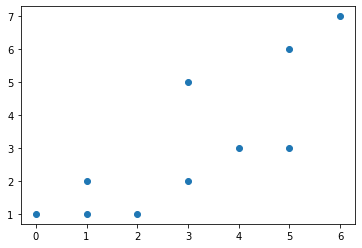

In [4]:
plt.scatter(df.x, df.y)

In [5]:
df['2x+1'] = df['x']*2+1
df1 = df.copy()
df1['diff'] = df.y - df['2x+1']
df1['diff_square'] = df1['diff']**2
mse = sum(df1.diff_square)/len(df1.x)
print(mse)
df1

21.1


,x,y,2x+1,diff,diff_square
0,2,1,5,-4,16
1,3,2,7,-5,25
2,1,2,3,-1,1
3,1,1,3,-2,4
4,0,1,1,0,0
5,5,3,11,-8,64
6,4,3,9,-6,36
7,6,7,13,-6,36
8,5,6,11,-5,25
9,3,5,7,-2,4


In [6]:
def mse(actual, predicted):
    mean_squared_error = ((actual - predicted)**2).sum()/len(df.x)
    return mean_squared_error

print(mse(df.y, df['2x+1']))

21.1


In [7]:
print(mse(df.y, df.x))

1.5


In [8]:
df['2x-1'] = df['x']*2-1
df
print(mse(df.y, df['2x-1']))

9.5


In [9]:
df['x-0.5'] = df['x']-0.5
df
print(mse(df.y, df['x-0.5']))

1.85


In [10]:
df['x+0.5'] = df['x']+0.5
df
print(mse(df.y, df['x+0.5']))

1.65


f(x) = x has the lowest mean squared error 

In [11]:
mses = pd.DataFrame({
    'values': [21.2, 1.5, 9.5, 1.85, 1.65]
}, index=['2x+1', 'x', '2x-1', 'x-0.5', 'x+0.5'])
mses

,values
2x+1,21.20
x,1.50
2x-1,9.50
x-0.5,1.85
x+0.5,1.65


In [12]:
df

,x,y,2x+1,2x-1,x-0.5,x+0.5
0,2,1,5,3,1.5,2.5
1,3,2,7,5,2.5,3.5
2,1,2,3,1,0.5,1.5
3,1,1,3,1,0.5,1.5
4,0,1,1,-1,-0.5,0.5
5,5,3,11,9,4.5,5.5
6,4,3,9,7,3.5,4.5
7,6,7,13,11,5.5,6.5
8,5,6,11,9,4.5,5.5
9,3,5,7,5,2.5,3.5


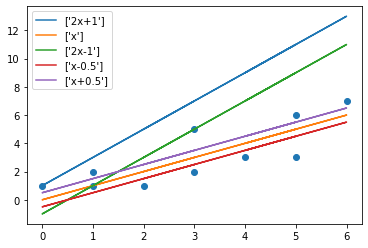

In [13]:
plt.scatter(df.x, df.y)
plt.plot(df.x, df['2x+1'], label=['2x+1'])
plt.plot(df.x, df.x, label=['x'])
plt.plot(df.x, df['2x-1'], label=['2x-1'])
plt.plot(df.x, df['x-0.5'], label=['x-0.5'])
plt.plot(df.x, df['x+0.5'], label=['x+0.5'])
plt.legend()

In [14]:
def mae(actual, predicted):
    mean_absolute_error = (abs(actual - predicted)).sum()/len(df.x)
    return mean_absolute_error
print(mae(df.y, df['2x+1']))
print(mae(df.y, df.x))
print(mae(df.y, df['2x-1']))
print(mae(df.y, df['x-0.5']))
print(mae(df.y, df['x+0.5']))

3.9
1.1
2.5
1.2
1.1


f(x) = x or f(x) = x+0.5 both have the combined lowest mean absolute errors.

In [15]:
maes = pd.DataFrame({
    'values': [3.9,1.1,2.5,1.2,1.1]
}, index=['2x+1', 'x', '2x-1', 'x-0.5', 'x+0.5'])
maes

,values
2x+1,3.9
x,1.1
2x-1,2.5
x-0.5,1.2
x+0.5,1.1


## Exercise 2

In [16]:
df2 = pd.DataFrame({
    'x': [2,3,1,1,0,5,4,6,5,3],
    'y': [1,2,2,1,1,3,3,7,6,5],
    'w1=0': [0*x for x in df['x']],
    'w1=1/5': [1/5*x for x in df['x']],
    'w1=1/4': [1/4*x for x in df['x']],
    'w1=1/3': [1/3*x for x in df['x']],
    'w1=1/2': [1/2*x for x in df['x']],
    'w1=1': [1*x for x in df['x']],
    'w1=2': [2*x for x in df['x']],
    'w1=3': [3*x for x in df['x']],
    'w1=4': [4*x for x in df['x']],
    'w1=5': [5*x for x in df['x']],
})
df2

,x,y,w1=0,w1=1/5,w1=1/4,w1=1/3,w1=1/2,w1=1,w1=2,w1=3,w1=4,w1=5
0,2,1,0,0.4,0.50,0.666667,1.0,2,4,6,8,10
1,3,2,0,0.6,0.75,1.000000,1.5,3,6,9,12,15
2,1,2,0,0.2,0.25,0.333333,0.5,1,2,3,4,5
3,1,1,0,0.2,0.25,0.333333,0.5,1,2,3,4,5
4,0,1,0,0.0,0.00,0.000000,0.0,0,0,0,0,0
5,5,3,0,1.0,1.25,1.666667,2.5,5,10,15,20,25
6,4,3,0,0.8,1.00,1.333333,2.0,4,8,12,16,20
7,6,7,0,1.2,1.50,2.000000,3.0,6,12,18,24,30
8,5,6,0,1.0,1.25,1.666667,2.5,5,10,15,20,25
9,3,5,0,0.6,0.75,1.000000,1.5,3,6,9,12,15


In [17]:
df2['mses'] = [mse(df.y, df2['w1=0']), mse(df.y, df2['w1=1/5']),mse(df.y, df2['w1=1/4']),mse(df.y, df2['w1=1/3']),mse(df.y, df2['w1=1/2'])
              ,mse(df.y, df2['w1=1']),mse(df.y, df2['w1=2']),mse(df.y, df2['w1=3']),mse(df.y, df2['w1=4'])
              ,mse(df.y, df2['w1=5'])]
df2

,x,y,w1=0,w1=1/5,w1=1/4,w1=1/3,w1=1/2,w1=1,w1=2,w1=3,w1=4,w1=5,mses
0,2,1,0,0.4,0.50,0.666667,1.0,2,4,6,8,10,13.900000
1,3,2,0,0.6,0.75,1.000000,1.5,3,6,9,12,15,9.404000
2,1,2,0,0.2,0.25,0.333333,0.5,1,2,3,4,5,8.437500
3,1,1,0,0.2,0.25,0.333333,0.5,1,2,3,4,5,6.966667
4,0,1,0,0.0,0.00,0.000000,0.0,0,0,0,0,0,4.550000
5,5,3,0,1.0,1.25,1.666667,2.5,5,10,15,20,25,1.500000
6,4,3,0,0.8,1.00,1.333333,2.0,4,8,12,16,20,14.300000
7,6,7,0,1.2,1.50,2.000000,3.0,6,12,18,24,30,52.300000
8,5,6,0,1.0,1.25,1.666667,2.5,5,10,15,20,25,115.500000
9,3,5,0,0.6,0.75,1.000000,1.5,3,6,9,12,15,203.900000


In [18]:
print(mse(df.y, df2['w1=0']),mse(df.y, df2['w1=1/5']),mse(df.y, df2['w1=1/4']),mse(df.y, df2['w1=1/3']),mse(df.y, df2['w1=1/2'])
     ,mse(df.y, df2['w1=1']),mse(df.y, df2['w1=2']),mse(df.y, df2['w1=3']),mse(df.y, df2['w1=4']),mse(df.y, df2['w1=5']))

13.9 9.404 8.4375 6.966666666666667 4.55 1.5 14.3 52.3 115.5 203.9


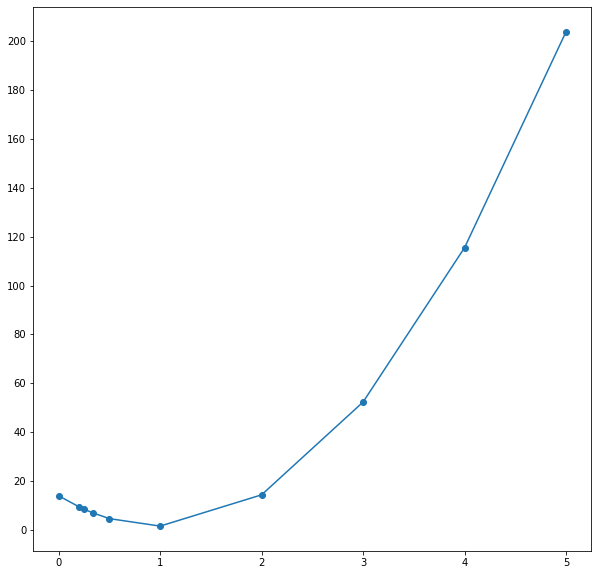

In [19]:
plt.figure(figsize = (10,10))
plt.scatter(y=[13.9, 9.404, 8.4375, 6.966666666666667, 4.55, 1.5, 14.3, 52.3, 115.5, 203.9],
           x=[0,1/5,1/4,1/3,1/2,1,2,3,4,5])
plt.plot([0,1/5,1/4,1/3,1/2,1,2,3,4,5],
        [13.9, 9.404, 8.4375, 6.966666666666667, 4.55, 1.5, 14.3, 52.3, 115.5, 203.9])
plt.yticks([0,20,40,60,80,100,120,140,160,180,200])
plt.show()

In [20]:
df3 = pd.DataFrame({
    'x': [2,3,1,1,0,5,4,6,5,3],
    'y': [1,2,2,1,1,3,3,7,6,5],
    'w0=-4': [1*x+-4 for x in df['x']],
    'w0=-3': [1*x+-3 for x in df['x']],
    'w0=-2': [1*x+-2 for x in df['x']],
    'w0=-1': [1*x+-1 for x in df['x']],
    'w0=0': [1*x+0 for x in df['x']],
    'w0=1': [1*x+1 for x in df['x']],
    'w0=2': [1*x+2 for x in df['x']],
    'w0=3': [1*x+3 for x in df['x']],
    'w0=4': [1*x+4 for x in df['x']],
    'w0=5': [1*x+5 for x in df['x']],
})
df3

,x,y,w0=-4,w0=-3,w0=-2,w0=-1,w0=0,w0=1,w0=2,w0=3,w0=4,w0=5
0,2,1,-2,-1,0,1,2,3,4,5,6,7
1,3,2,-1,0,1,2,3,4,5,6,7,8
2,1,2,-3,-2,-1,0,1,2,3,4,5,6
3,1,1,-3,-2,-1,0,1,2,3,4,5,6
4,0,1,-4,-3,-2,-1,0,1,2,3,4,5
5,5,3,1,2,3,4,5,6,7,8,9,10
6,4,3,0,1,2,3,4,5,6,7,8,9
7,6,7,2,3,4,5,6,7,8,9,10,11
8,5,6,1,2,3,4,5,6,7,8,9,10
9,3,5,-1,0,1,2,3,4,5,6,7,8


In [21]:
mses2 = [mse(df3.y, df3['w0=-4']),mse(df3.y, df3['w0=-3']),mse(df3.y, df3['w0=-2']),mse(df3.y, df3['w0=-1']),
         mse(df3.y, df3['w0=0']),mse(df3.y, df3['w0=1']),mse(df3.y, df3['w0=2']),mse(df3.y, df3['w0=3']),
         mse(df3.y, df3['w0=4']),mse(df3.y, df3['w0=5'])]
print(mses2)

[18.3, 11.1, 5.9, 2.7, 1.5, 2.3, 5.1, 9.9, 16.7, 25.5]


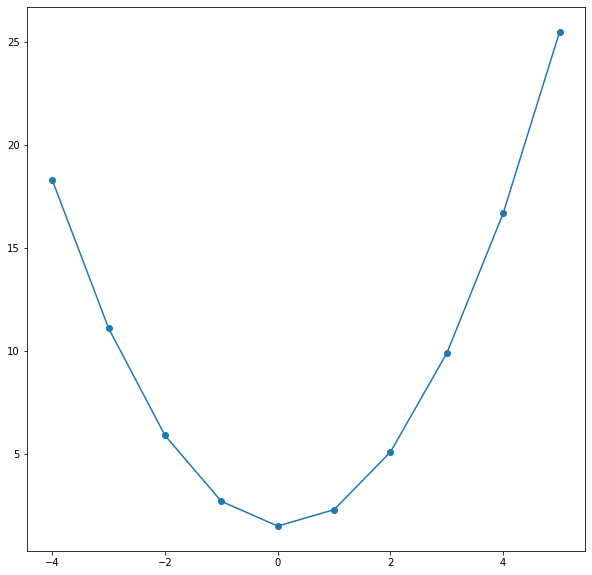

In [22]:
plt.figure(figsize = (10,10))
plt.scatter(y=mses2,
           x=[-4,-3,-2,-1,0,1,2,3,4,5])
plt.plot([-4,-3,-2,-1,0,1,2,3,4,5],
        mses2)
plt.show()

In [23]:
X = np.array([[1,1],
             [1,1],
             [1,1],
             [1,1],
             [1,1],
             [1,2]])
Xt = X.transpose()
print(Xt)

y = np.array([[1.0],
              [0.8],
              [1.2],
              [1.1],
              [0.7],
              [2.0]])


[[1 1 1 1 1 1]
 [1 1 1 1 1 2]]


In [24]:
print(Xt@X)

[[6 7]
 [7 9]]


In [25]:
print(np.linalg.inv(Xt@X))

[[ 1.8 -1.4]
 [-1.4  1.2]]


In [26]:
print(Xt@y)

[[6.8]
 [8.8]]


In [27]:
Xt_1 = np.linalg.inv(Xt@X)
Xt_1

array([[ 1.8, -1.4],
       [-1.4,  1.2]])

In [28]:
print(Xt_1)
print(y)
print(Xt_1@Xt)
print((Xt_1@Xt)@y)
w = (Xt_1@Xt)@y
print(w.transpose())

[[ 1.8 -1.4]
 [-1.4  1.2]]
[[1. ]
 [0.8]
 [1.2]
 [1.1]
 [0.7]
 [2. ]]
[[ 0.4  0.4  0.4  0.4  0.4 -1. ]
 [-0.2 -0.2 -0.2 -0.2 -0.2  1. ]]
[[-0.08]
 [ 1.04]]
[[-0.08  1.04]]


In [29]:
df_polynomial = pd.DataFrame({
    'x': [1,2,3,5,7,8,2.5,8],
    'y': [2.2,3.5,3.9,2.9,5,6.2,3,4.8]
})
df_polynomial['x_squared'] = df_polynomial.x**2
df_polynomial['x_cubed'] = df_polynomial.x**3
df_polynomial

,x,y,x_squared,x_cubed
0,1.0,2.2,1.00,1.000
1,2.0,3.5,4.00,8.000
2,3.0,3.9,9.00,27.000
3,5.0,2.9,25.00,125.000
4,7.0,5.0,49.00,343.000
5,8.0,6.2,64.00,512.000
6,2.5,3.0,6.25,15.625
7,8.0,4.8,64.00,512.000


In [30]:
X_squared_matrix = np.array([[1, 1, 1],
                            [1,2,4],
                            [1,3,9],
                            [1,5,25],
                           [1,7,49],
                             [1,8,64],
                             [1,2.5,6.25],
                             [1,8,64]])
y = np.array([[2.2],
             [3.5],
             [3.9],
             [2.9],
            [5.0],
             [6.2],
             [3.0],
             [4.8]])

X_squared_T = X_squared_matrix.transpose()
X_squared_T_inv = np.linalg.inv(X_squared_T@X_squared_matrix)
print((X_squared_T_inv@X_squared_T)@y)
ws_squared = ((X_squared_T_inv@X_squared_T)@y).transpose()
ws_squared

[[2.7167995 ]
 [0.03485877]
 [0.03821489]]


array([[2.7167995 , 0.03485877, 0.03821489]])

In [31]:
X_cubed_matrix = np.array([[1, 1, 1, 1],
                            [1,2,4,8],
                            [1,3,9,27],
                            [1,5,25,125],
                           [1,7,49,343],
                             [1,8,64,512],
                             [1,2.5,6.25,15.625],
                             [1,8,64,512]])

X_cubed_T = X_cubed_matrix.transpose()
X_cubed_T_inv = np.linalg.inv(X_cubed_T@X_cubed_matrix)
ws_cubed = ((X_cubed_T_inv@X_cubed_T)@y).transpose()
ws_cubed

array([[ 0.84346828,  1.95172897, -0.4743834 ,  0.03818664]])

In [38]:
df_polynomial

df_polynomial['y_pred_quadratic'] = ws_squared[0][0] + ws_squared[0][1]*df_polynomial['x'] + ws_squared[0][2]*df_polynomial['x']**2
df_polynomial['y_pred_cubatic'] = ws_cubed[0][0] + ws_cubed[0][1]*df_polynomial['x'] + ws_cubed[0][2]*df_polynomial['x']**2
+ ws_cubed[0][3]*df_polynomial['x']**3
#print(ws_squared[0][1])
df_polynomial

,x,y,x_squared,x_cubed,y_pred_quadratic,y_pred_cubatic
0,1.0,2.2,1.00,1.000,2.789873,2.320814
1,2.0,3.5,4.00,8.000,2.939377,2.849393
2,3.0,3.9,9.00,27.000,3.165310,2.429205
3,5.0,2.9,25.00,125.000,3.846466,-1.257472
4,7.0,5.0,49.00,343.000,4.833340,-8.739216
5,8.0,6.2,64.00,512.000,5.441422,-13.903238
6,2.5,3.0,6.25,15.625,3.042789,2.757894
7,8.0,4.8,64.00,512.000,5.441422,-13.903238


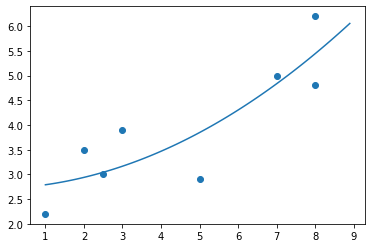

In [45]:
x = np.arange(1,9,0.1)
y = [ws_squared[0][0] + ws_squared[0][1]*x + ws_squared[0][2]*x**2 for x in x]
plt.scatter(df_polynomial['x'], df_polynomial['y'])
plt.plot(x,y)
plt.show()

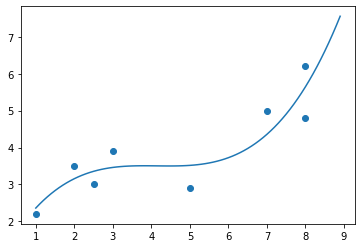

In [46]:
x = np.arange(1,9,0.1)
y = [ws_cubed[0][0] + ws_cubed[0][1]*x + ws_cubed[0][2]*x**2 + ws_cubed[0][3]*x**3 for x in x]
plt.scatter(df_polynomial['x'], df_polynomial['y'])
plt.plot(x,y)
plt.show()